# datetime index

In [2]:
from datetime import datetime

In [5]:
my_year=2020
my_month=1
my_day=2
my_hour=13
my_min=1
my_sec=15

In [7]:
my_date=datetime(my_year,my_month,my_day)

In [9]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [11]:
my_day_time=datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [16]:
my_day_time.hour

13

In [18]:
import numpy as np

In [37]:
np.array(['2010-03-14','2019-4-23'],dtype='datetime64[D]')

ValueError: Error parsing datetime string "2019-4-23" at position 5

In [32]:
np.arange("2018-06-01",'2018-06-23',7,dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [39]:
np.arange("1968",'1973',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972'], dtype='datetime64[Y]')

In [42]:
import pandas as pd

In [43]:
pd.date_range('2020-01-01',periods=7,freq="D")

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [67]:
pd.to_datetime(['2018/01/03','2019-02-04','Jan 01, 2018'])

DatetimeIndex(['2018-01-03', '2019-02-04', '2018-01-01'], dtype='datetime64[ns]', freq=None)

# time resampling

In [71]:
import pandas as pd

In [79]:
df=pd.read_csv("D:\\！course-aalto\\analysis and data science\\TimeSeriesAnalysis\\code\\UDEMY_TSA_FINAL\\Data\\starbucks.csv",index_col="Date",parse_dates=True)
# parse_dates=True, is to change the time from string into datetime

In [81]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [84]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [91]:
# daily----yearly, and use different measurement to deal with the data
df.resample(rule="A").mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [93]:
def first_day(entry):
    if len(entry): # is there an entry?
        return entry[0] # is so, return fist entry

In [95]:
df.resample(rule="A").apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


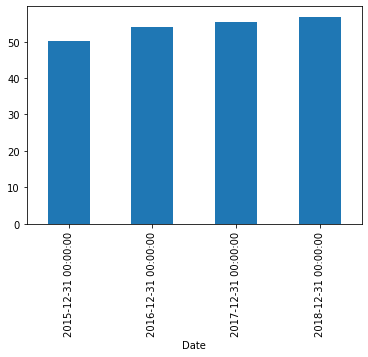

In [99]:
%matplotlib inline
df["Close"].resample("A").mean().plot.bar()

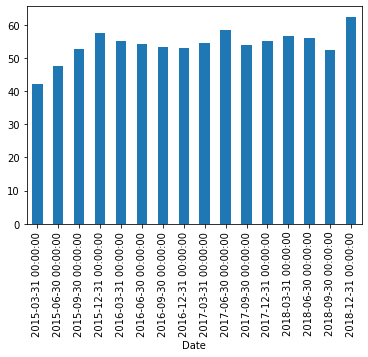

In [106]:
df["Close"].resample("Q").mean().plot.bar()

# time shifting

In [109]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [111]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [115]:
# shift the fist row data into next row
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [117]:
df.shift(-1).head()  # make the second row data into the first row

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


# rolling and expanding

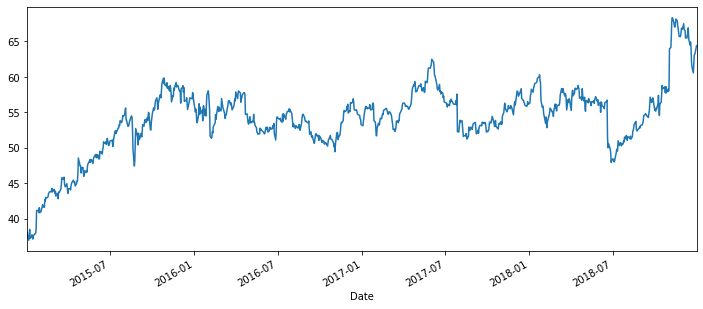

In [119]:
df["Close"].plot(figsize=(12,5))

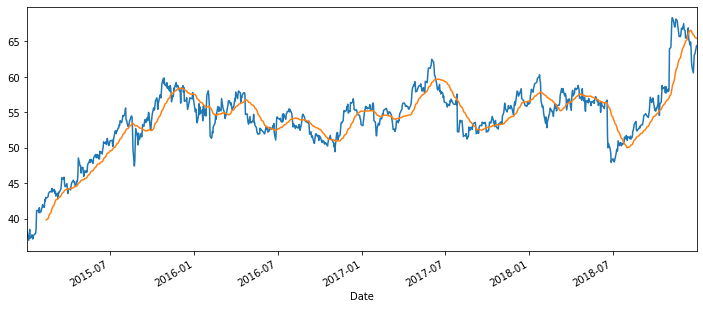

In [126]:
# 前windows天的平均值
df["Close"].plot(figsize=(12,5))
df.rolling(window=30).mean()["Close"].plot()  # the average value in the past 30 days.

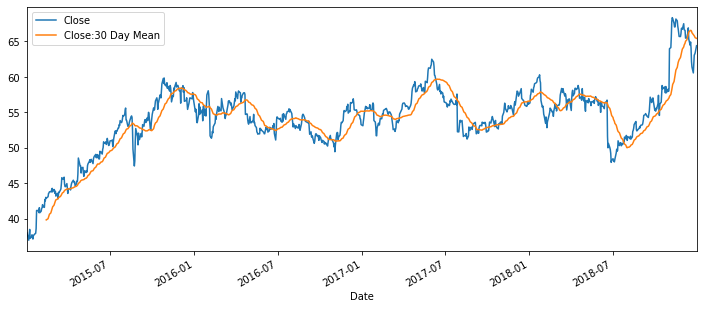

In [131]:
df["Close:30 Day Mean"]=df["Close"].rolling(window=30).mean()
df[["Close",'Close:30 Day Mean']].plot(figsize=(12,5))

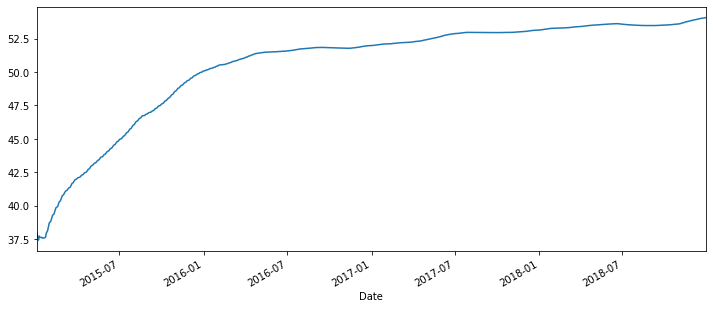

In [133]:
# expanding, calculate the average value that that all the data show before. 所有之前的值都考虑之前
df['Close'].expanding().mean().plot(figsize=(12,5))

# visualize time series data

In [135]:
df.index=pd.to_datetime(df.index)

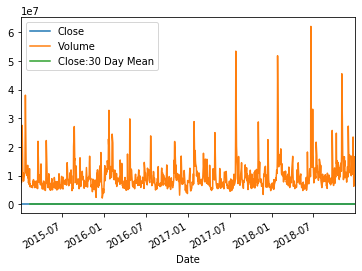

In [138]:
df.plot()

[Text(0, 0.5, 'dd'), Text(0.5, 0, 'dd')]

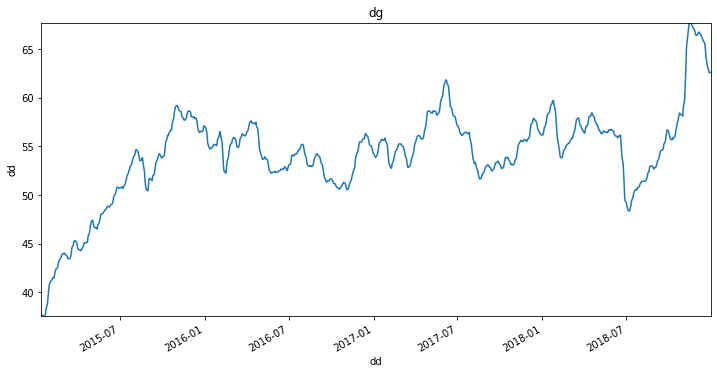

In [146]:
ax=df["Close"].rolling(window=7).mean().plot(figsize=(12,6),title='dg')
ax.autoscale(axis="both",tight=True)
ax.set(xlabel="dd",ylabel="dd")


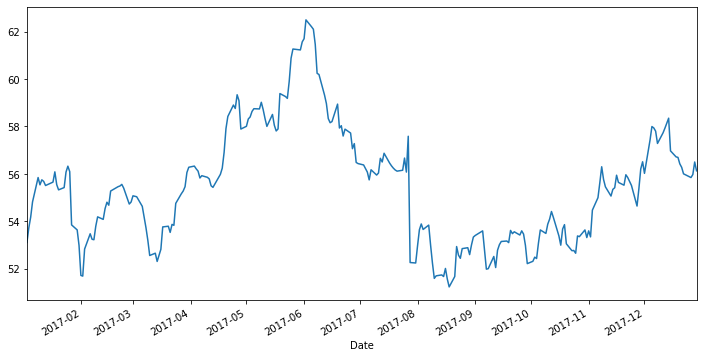

In [151]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,6))

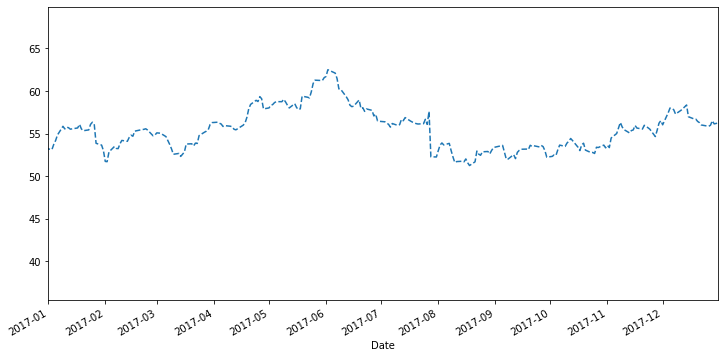

In [155]:
df['Close'].plot(figsize=(12,6),xlim=['2017-01-01','2017-12-31'],ls="--")